# Contents

* [Libraries](#Libraries)
* [Data](#Data)
* [Data Cleaning](#Data-Cleaning)
* [Summary Stats](#Summary-Stats)
* [EDA](#EDA)
* [Export Clean Dataset](#Export-Clean-Dataset)

# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

# Data 

In [2]:
df_train = pd.read_csv('../datasets/train.csv')
df_test = pd.read_csv('../datasets/test.csv')

print(df_train.shape)
df_train.head()

(2051, 81)


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [3]:
print(df_test.shape)
df_test.head()

(878, 80)


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


# Data Cleaning

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [5]:
df_test.columns = df_test.columns.str.replace(' ', '_').str.lower()
df_train.columns = df_train.columns.str.replace(' ', '_').str.lower()

In [6]:
df_train[df_train.columns[df_train.isnull().any()]].isnull().sum()

#https://stackoverflow.com/questions/36226083/how-to-find-which-columns-
#contain-any-nan-value-in-pandas-dataframe

lot_frontage       330
alley             1911
mas_vnr_type        22
mas_vnr_area        22
bsmt_qual           55
bsmt_cond           55
bsmt_exposure       58
bsmtfin_type_1      55
bsmtfin_sf_1         1
bsmtfin_type_2      56
bsmtfin_sf_2         1
bsmt_unf_sf          1
total_bsmt_sf        1
bsmt_full_bath       2
bsmt_half_bath       2
fireplace_qu      1000
garage_type        113
garage_yr_blt      114
garage_finish      114
garage_cars          1
garage_area          1
garage_qual        114
garage_cond        114
pool_qc           2042
fence             1651
misc_feature      1986
dtype: int64

In [7]:
df_test[df_test.columns[df_test.isnull().any()]].isnull().sum()

lot_frontage      160
alley             820
mas_vnr_type        1
mas_vnr_area        1
bsmt_qual          25
bsmt_cond          25
bsmt_exposure      25
bsmtfin_type_1     25
bsmtfin_type_2     25
electrical          1
fireplace_qu      422
garage_type        44
garage_yr_blt      45
garage_finish      45
garage_qual        45
garage_cond        45
pool_qc           874
fence             706
misc_feature      837
dtype: int64

### Dummy/map columns with ranks for values

In [8]:
df_train['lot_shape'] = df_train['lot_shape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
df_train['utilities'] = df_train['utilities'].map({'AllPub':3,  'NoSeWa':2,  'NoSewr': 1, 'ELO': 0})
df_train['land_slope'] = df_train['land_slope'].map({'Gtl': 2, 'Mod': 1, 'Sev': 0 })
df_train['exter_qual'] = df_train['exter_qual'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0})
df_train['exter_cond'] = df_train['exter_cond'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0})
df_train['bsmt_qual'] = df_train['bsmt_qual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df_train['bsmt_cond'] = df_train['bsmt_cond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df_train['bsmt_exposure'] = df_train['bsmt_exposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
df_train['heating_qc'] = df_train['heating_qc'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0})
df_train['kitchen_qual'] = df_train['kitchen_qual'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0})
df_train['functional'] = df_train['functional'].map({'Typ': 7, 'Min2': 6, 'Min1': 5, 'Mod': 4, 'Maj1': 3,
                                                     'Maj2': 2, 'Sev': 1, 'Sal': 0})
df_train['fireplace_qu'] = df_train['fireplace_qu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df_train['garage_qual'] = df_train['garage_qual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df_train['garage_cond'] = df_train['garage_cond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})

In [9]:
df_test['lot_shape'] = df_test['lot_shape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
df_test['utilities'] = df_test['utilities'].map({'AllPub':3,  'NoSeWa':2,  'NoSewr': 1, 'ELO': 0})
df_test['land_slope'] = df_test['land_slope'].map({'Gtl': 2, 'Mod': 1, 'Sev': 0 })
df_test['exter_qual'] = df_test['exter_qual'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0})
df_test['exter_cond'] = df_test['exter_cond'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0})
df_test['bsmt_qual'] = df_test['bsmt_qual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df_test['bsmt_cond'] = df_test['bsmt_cond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df_test['bsmt_exposure'] = df_test['bsmt_exposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
df_test['heating_qc'] = df_test['heating_qc'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0})
df_test['kitchen_qual'] = df_test['kitchen_qual'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0})
df_test['functional'] = df_test['functional'].map({'Typ': 7, 'Min2': 6, 'Min1': 5, 'Mod': 4, 'Maj1': 3,
                                                   'Maj2': 2, 'Sev': 1, 'Sal': 0})
df_test['fireplace_qu'] = df_test['fireplace_qu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df_test['garage_qual'] = df_test['garage_qual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df_test['garage_cond'] = df_test['garage_cond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})

In [10]:
df_train = pd.get_dummies(df_train, columns = ['paved_drive', 'ms_zoning', 'exterior_1st', 
                                               'heating', 'electrical', 'sale_type', 'neighborhood', 
                                               'condition_1', 'foundation', 'bsmt_exposure', 
                                               'bsmtfin_type_1'], 
                          drop_first = True) 
df_test = pd.get_dummies(df_test, columns = ['paved_drive', 'ms_zoning', 'exterior_1st', 
                                             'heating', 'electrical', 'sale_type', 'neighborhood', 
                                             'condition_1', 'foundation', 'bsmt_exposure', 
                                             'bsmtfin_type_1'], 
                         drop_first = True)

df_train['paved_drive_Y'] = df_train['paved_drive_Y'] + df_train['paved_drive_P']
df_test['paved_drive_Y'] = df_test['paved_drive_Y'] + df_test['paved_drive_P']

### Get total sq. ft. column

In [11]:
sf_columns = [cols for cols in df_train.columns if 'sf' in cols]

df_train['total_sq_ft'] = df_train['bsmtfin_sf_1'] + df_train['bsmtfin_sf_2'] + \
df_train['bsmt_unf_sf'] + df_train['total_bsmt_sf'] + df_train['1st_flr_sf'] + \
df_train['2nd_flr_sf'] + df_train['low_qual_fin_sf'] + df_train['wood_deck_sf'] + df_train['open_porch_sf']

df_test['total_sq_ft'] = df_test['bsmtfin_sf_1'] + df_test['bsmtfin_sf_2'] + \
df_test['bsmt_unf_sf'] + df_test['total_bsmt_sf'] + df_test['1st_flr_sf'] + \
df_test['2nd_flr_sf'] + df_test['low_qual_fin_sf'] + df_test['wood_deck_sf'] + df_test['open_porch_sf']

### Drop columns and fill nulls

In [12]:
df_train.drop(['alley', 'pool_qc', 'fence', 
               'misc_feature', 'paved_drive_P'], 
              axis = 1, inplace = True)
df_test.drop(['alley', 'pool_qc', 'fence', 
              'misc_feature', 'paved_drive_P'], 
             axis = 1, inplace = True)

df_train.fillna(value = 0, inplace = True)
df_test.fillna(value = 0, inplace = True)

# Summary Stats

In [13]:
df_train.describe()

,id,pid,ms_subclass,lot_frontage,lot_area,lot_shape,utilities,land_slope,overall_qual,overall_cond,...,foundation_Wood,bsmt_exposure_2.0,bsmt_exposure_3.0,bsmt_exposure_4.0,bsmtfin_type_1_BLQ,bsmtfin_type_1_GLQ,bsmtfin_type_1_LwQ,bsmtfin_type_1_Rec,bsmtfin_type_1_Unf,total_sq_ft
count,2051.000000,2.051000e+03,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,57.944417,10065.208191,2.595807,2.998537,1.947343,6.112140,5.562165,...,0.000975,0.079473,0.140419,0.098976,0.097513,0.299854,0.049732,0.089225,0.294003,3755.227694
std,843.980841,1.886918e+08,42.824223,33.137332,6742.488909,0.566514,0.049365,0.244264,1.426271,1.104497,...,0.031220,0.270542,0.347506,0.298703,0.296728,0.458305,0.217443,0.285137,0.455704,1278.580613
min,1.000000,5.263011e+08,20.000000,0.000000,1300.000000,0.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,753.500000,5.284581e+08,20.000000,43.500000,7500.000000,2.000000,3.000000,2.000000,5.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2931.000000
50%,1486.000000,5.354532e+08,50.000000,63.000000,9430.000000,3.000000,3.000000,2.000000,6.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3595.000000
75%,2198.000000,9.071801e+08,70.000000,78.000000,11513.500000,3.000000,3.000000,2.000000,7.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,4470.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,3.000000,3.000000,2.000000,10.000000,9.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18368.000000


In [14]:
df_train['saleprice'].describe()

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: saleprice, dtype: float64

### Outliers

In [15]:
q1 = (df_train['gr_liv_area']).quantile(.25)
q3 = (df_train['gr_liv_area']).quantile(.75)
IQR = q3 - q1
outliers_gr_liv_area = q3 + 1.5 * IQR
print('gr_liv_area outliers:', outliers_gr_liv_area)

q1 = (df_train['total_bsmt_sf']).quantile(.25)
q3 = (df_train['total_bsmt_sf']).quantile(.75)
IQR = q3 - q1
outliers_total_bsmt_sf = q3 + 1.5 * IQR
print('total_bsmt_sf outliers:', outliers_total_bsmt_sf)

q1 = (df_train['lot_frontage']).quantile(.25)
q3 = (df_train['lot_frontage']).quantile(.75)
IQR = q3 - q1
outliers_lot_frontage = q3 + 1.5 * IQR
print('lot_frontage outliers:', outliers_lot_frontage)

q1 = (df_train['total_sq_ft']).quantile(.25)
q3 = (df_train['total_sq_ft']).quantile(.75)
IQR = q3 - q1
outliers_total_sq_ft = q3 + 1.5 * IQR
print('total_sq_ft outliers:', outliers_total_sq_ft)

q1 = (df_train['lot_area']).quantile(.25)
q3 = (df_train['lot_area']).quantile(.75)
IQR = q3 - q1
outliers_lot_area = q3 + 1.5 * IQR
print('lot_area outliers:', outliers_lot_area)

gr_liv_area outliers: 2627.75
total_bsmt_sf outliers: 2106.75
lot_frontage outliers: 129.75
total_sq_ft outliers: 6778.5
lot_area outliers: 17533.75


### Drop Outiers

In [16]:
df_train.drop(index = [328, 441, 471, 694, 960, 1335, 1875, 1885], inplace = True)

# EDA 

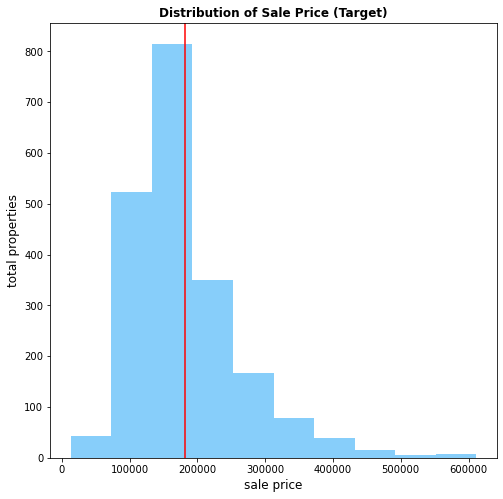

In [17]:
plt.figure(figsize = (8,8))

plt.hist(df_train['saleprice'], color = 'lightskyblue')
plt.axvline(x = df_train['saleprice'].mean(), color = 'r', label = 'average sale price')
plt.xlabel('sale price', fontsize = 12)
plt.ylabel('total properties', fontsize = 12)
plt.title('Distribution of Sale Price (Target)', fontweight = 'bold', fontsize = 12);

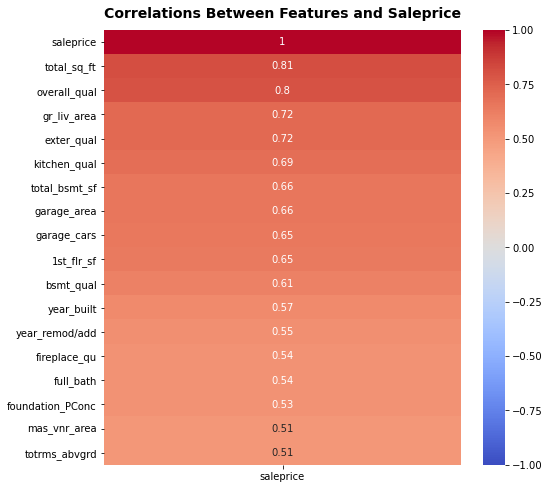

In [18]:
plt.figure(figsize = (8, 8))
sns.heatmap(df_train.corr()[['saleprice']][df_train.corr()['saleprice'] > .5].sort_values('saleprice', 
                                                                                         ascending = False), 
            annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1)
plt.title('Correlations Between Features and Saleprice', 
          fontsize = 14, fontweight = 'bold', pad = 12);

plt.savefig('heatmap.png');

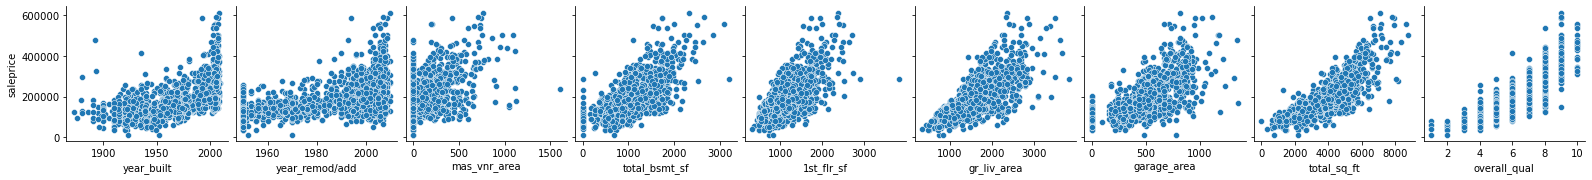

In [19]:
sns.pairplot(df_train, x_vars = ['year_built','year_remod/add',
                                 'mas_vnr_area','total_bsmt_sf',
                                 '1st_flr_sf','gr_liv_area', 
                                 'garage_area', 'total_sq_ft', 
                                 'overall_qual'], 
                                               
             y_vars = ['saleprice']);

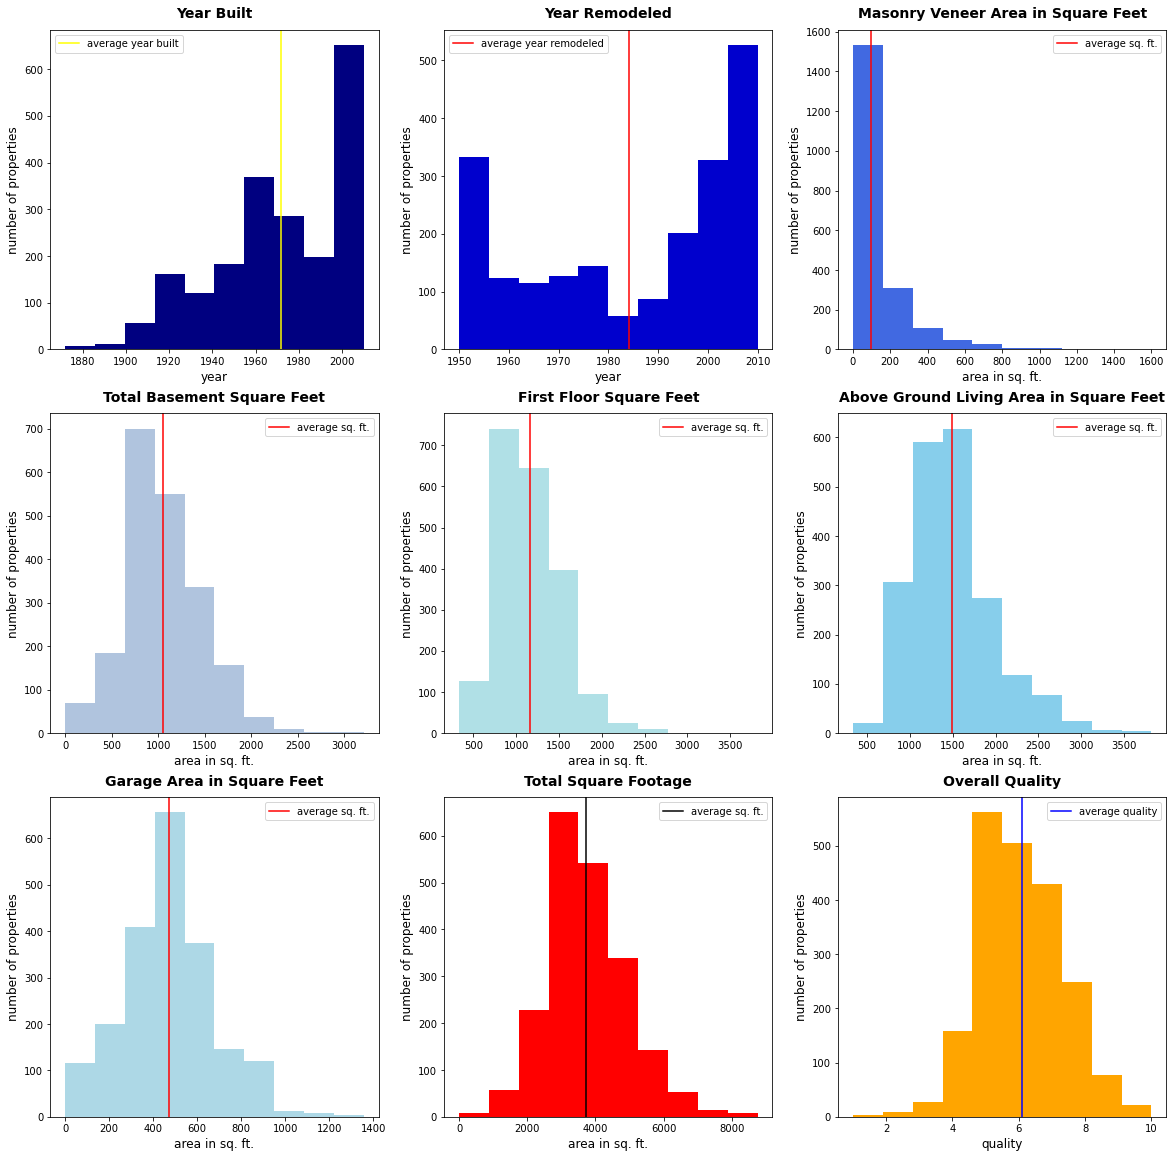

In [20]:
fig, ax = plt.subplots(3, 3, figsize = (20, 20))

ax[0][0].hist(df_train['year_built'], color = 'navy')
ax[0][0].axvline(x = df_train['year_built'].mean(), color = 'yellow', label = 'average year built')
ax[0][0].set_xlabel('year', fontsize = 12)
ax[0][0].set_ylabel('number of properties', fontsize = 12)
ax[0][0].set_title('Year Built', fontsize = 14, fontweight = 'bold', pad = 12)
ax[0][0].legend();

ax[0][1].hist(df_train['year_remod/add'], color = 'mediumblue')
ax[0][1].axvline(x = df_train['year_remod/add'].mean(), color = 'r', label = 'average year remodeled')
ax[0][1].set_xlabel('year', fontsize = 12)
ax[0][1].set_ylabel('number of properties', fontsize = 12)
ax[0][1].set_title('Year Remodeled', fontsize = 14, fontweight = 'bold', pad = 12)
ax[0][1].legend();

ax[0][2].hist(df_train['mas_vnr_area'], color = 'royalblue')
ax[0][2].axvline(x = df_train['mas_vnr_area'].mean(), color = 'r', label = 'average sq. ft.')
ax[0][2].set_xlabel('area in sq. ft.', fontsize = 12)
ax[0][2].set_ylabel('number of properties', fontsize = 12)
ax[0][2].set_title('Masonry Veneer Area in Square Feet', fontsize = 14, fontweight = 'bold', pad = 12)
ax[0][2].legend();

ax[1][0].hist(df_train['total_bsmt_sf'], color = 'lightsteelblue')
ax[1][0].axvline(x = df_train['total_bsmt_sf'].mean(), color = 'r', label = 'average sq. ft.')
ax[1][0].set_xlabel('area in sq. ft.', fontsize = 12)
ax[1][0].set_ylabel('number of properties', fontsize = 12)
ax[1][0].set_title('Total Basement Square Feet', fontsize = 14, fontweight = 'bold', pad = 12)
ax[1][0].legend();

ax[1][1].hist(df_train['1st_flr_sf'], color = 'powderblue')
ax[1][1].axvline(x = df_train['1st_flr_sf'].mean(), color = 'r', label = 'average sq. ft.')
ax[1][1].set_xlabel('area in sq. ft.', fontsize = 12)
ax[1][1].set_ylabel('number of properties', fontsize = 12)
ax[1][1].set_title('First Floor Square Feet', fontsize = 14, fontweight = 'bold', pad = 12)
ax[1][1].legend();

ax[1][2].hist(df_train['gr_liv_area'], color = 'skyblue')
ax[1][2].axvline(x = df_train['gr_liv_area'].mean(), color = 'r', label = 'average sq. ft.')
ax[1][2].set_xlabel('area in sq. ft.', fontsize = 12)
ax[1][2].set_ylabel('number of properties', fontsize = 12)
ax[1][2].set_title('Above Ground Living Area in Square Feet', fontsize = 14, fontweight = 'bold', pad = 12)
ax[1][2].legend();

ax[2][0].hist(df_train['garage_area'], color = 'lightblue')
ax[2][0].axvline(x = df_train['garage_area'].mean(), color = 'r', label = 'average sq. ft.')
ax[2][0].set_xlabel('area in sq. ft.', fontsize = 12)
ax[2][0].set_ylabel('number of properties', fontsize = 12)
ax[2][0].set_title('Garage Area in Square Feet', fontsize = 14, fontweight = 'bold', pad = 12)
ax[2][0].legend();

ax[2][1].hist(df_train['total_sq_ft'], color = 'red')
ax[2][1].axvline(x = df_train['total_sq_ft'].mean(), color = 'k', label = 'average sq. ft.')
ax[2][1].set_xlabel('area in sq. ft.', fontsize = 12)
ax[2][1].set_ylabel('number of properties', fontsize = 12)
ax[2][1].set_title('Total Square Footage', fontsize = 14, fontweight = 'bold', pad = 12)
ax[2][1].legend();

ax[2][2].hist(df_train['overall_qual'], color = 'orange')
ax[2][2].axvline(x = df_train['overall_qual'].mean(), color = 'b', label = 'average quality')
ax[2][2].set_xlabel('quality', fontsize = 12)
ax[2][2].set_ylabel('number of properties', fontsize = 12)
ax[2][2].set_title('Overall Quality', fontsize = 14, fontweight = 'bold', pad = 12)
ax[2][2].legend();

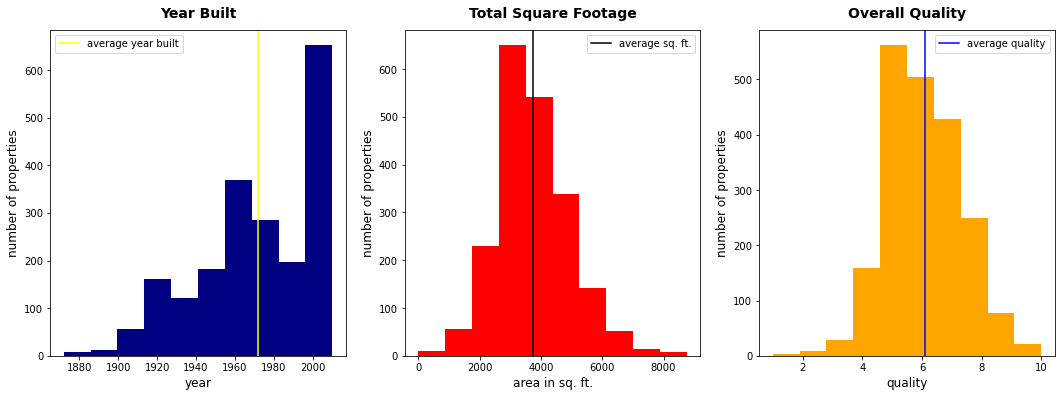

In [21]:
fig, ax = plt.subplots(1, 3, figsize = (18, 6))

ax[0].hist(df_train['year_built'], color = 'navy')
ax[0].axvline(x = df_train['year_built'].mean(), color = 'yellow', label = 'average year built')
ax[0].set_xlabel('year', fontsize = 12)
ax[0].set_ylabel('number of properties', fontsize = 12)
ax[0].set_title('Year Built', fontsize = 14, fontweight = 'bold', pad = 12)
ax[0].legend();

ax[1].hist(df_train['total_sq_ft'], color = 'red')
ax[1].axvline(x = df_train['total_sq_ft'].mean(), color = 'k', label = 'average sq. ft.')
ax[1].set_xlabel('area in sq. ft.', fontsize = 12)
ax[1].set_ylabel('number of properties', fontsize = 12)
ax[1].set_title('Total Square Footage', fontsize = 14, fontweight = 'bold', pad = 12)
ax[1].legend();

ax[2].hist(df_train['overall_qual'], color = 'orange')
ax[2].axvline(x = df_train['overall_qual'].mean(), color = 'blue', label = 'average quality')
ax[2].set_xlabel('quality', fontsize = 12)
ax[2].set_ylabel('number of properties', fontsize = 12)
ax[2].set_title('Overall Quality', fontsize = 14, fontweight = 'bold', pad = 12)
ax[2].legend();

plt.savefig('distributions of features.png');

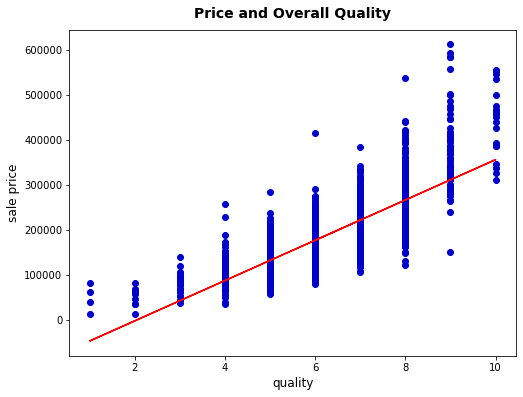

In [22]:
plt.figure(figsize = (8, 6))

x_line, y_line = df_train['overall_qual'], df_train['saleprice']

plt.scatter(x_line, y_line, color = 'mediumblue')

z = np.polyfit(x_line, y_line, 1)
y_hat = np.poly1d(z)(x_line)

plt.plot(x_line, y_hat, c ='r')
plt.xlabel('quality', fontsize = 12)
plt.ylabel('sale price', fontsize = 12)
plt.title('Price and Overall Quality', 
          fontsize = 14, fontweight = 'bold', pad = 12);

plt.savefig('price and overall quality.png');

# Export Clean Dataset

In [23]:
df_train.to_csv('../datasets/clean_train.csv')
df_test.to_csv('../datasets/clean_test.csv')